<h1>실습 5</h1>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import *

In [2]:
data = {'이름':['홍길동', '성춘향', '이몽룡', '김철수', '김영희', '김만수', '오지랖', '만순이','문정억', '백만원', '천만원','수십억', '현재미'],
        '몸무게': [95,85,75,70,65,55, 120, 100, 71,65, 75, 100,77],
        '키': [170,170, 170, 170, 170, 175, 171, 165, 164,177,163,192,182],
        '거주지':['서울', '대구', '대전', '서울','경북', '서울', '경북', '서울','서울','전남','전북','경북', '서울'],
        '주민번호':['81XXXX-1XXXXXX','81XXXX-1XXXXXX', '79XXXX-2XXXXXX', '71XXXX-1XXXXXX','65XXXX-2XXXXXX','81XXXX-1XXXXXX', '63XXXX-1XXXXXX', '81XXXX-3XXXXXX',
                '81XXXX-1234562','55XXXX-1234562', '71XXXX-2234562', '92XXXX-1234562','85XXXX-2234562'],
        '흡연여부':['흡연','미흡연', '미흡연', '흡연', '흡연', '미흡연', '흡연', '흡연', '흡연','미흡연', '미흡연', '미흡연','미흡연']
}
df=pd.DataFrame(data)

In [3]:
df.head()

,이름,몸무게,키,거주지,주민번호,흡연여부
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연


In [4]:
df_mod = df.copy()

In [5]:
encoing = LabelEncoder()
encoing.fit(df_mod["이름"])

df_mod["이름_인코딩"]=encoing.transform(df_mod["이름"])

In [6]:
print(list(encoing.classes_))#클래스 체크
print(list(encoing.inverse_transform([1,0])))

['김만수', '김영희', '김철수', '만순이', '문정억', '백만원', '성춘향', '수십억', '오지랖', '이몽룡', '천만원', '현재미', '홍길동']
['김영희', '김만수']


In [7]:
encoing2 = LabelEncoder()
encoing2.fit(df_mod["흡연여부"])

df_mod["흡연여부_인코딩"]= encoing2.transform(df_mod["흡연여부"])

In [8]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1


In [9]:
CurYear=2022

def stdInfo(rrn):
    #앞 2자리를 이용하여 나이 계산
    if int(rrn[:2])< 21 :
        biryear = 2000+ int(rrn[:2])
    else:
        biryear= 1900+int(rrn[:2])
    return CurYear - biryear

In [10]:
df_mod['나이'] = df_mod['주민번호'].apply(stdInfo)

In [11]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57


In [12]:
def sex(rrn):
    if int(rrn[7]) == 1 or int(rrn[7]) == 3:
        gen='남'
    else:
        gen='여'
    return gen

In [13]:
df_mod['성별'] = df_mod['주민번호'].apply(sex)

In [15]:
one_encoding = OneHotEncoder(sparse = False)

df_mod_one = pd.DataFrame(one_encoding.fit_transform(df_mod[['성별']]), columns=['성별_남','성별_여'])

In [16]:
df_mod = pd.concat([df_mod,df_mod_one], axis = 1)

In [17]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별,성별_남,성별_여
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남,1.0,0.0
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남,1.0,0.0
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여,0.0,1.0
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남,1.0,0.0
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여,0.0,1.0


In [18]:
df_mod['나이_범주'] = pd.cut(df_mod.나이, bins = [0,10,20,30,40,50,60,70], labels=[0,10,20,30,40,50,60])

In [19]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별,성별_남,성별_여,나이_범주
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남,1.0,0.0,40
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남,1.0,0.0,40
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여,0.0,1.0,40
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남,1.0,0.0,50
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여,0.0,1.0,50


In [20]:
df_mod.eval('BMI = 몸무게/((키/100)*(키/100))',inplace = True)

In [21]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별,성별_남,성별_여,나이_범주,BMI
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남,1.0,0.0,40,32.871972
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남,1.0,0.0,40,29.411765
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여,0.0,1.0,40,25.951557
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남,1.0,0.0,50,24.221453
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여,0.0,1.0,50,22.491349


In [22]:
df_mod['BMI분류'] = pd.cut(df_mod.BMI, bins=[0,18,23,25,30,90], labels=['저체중','정상','과체중','비만','고도비만'])
df_mod['BMI분류코드'] = df_mod['BMI분류'].map({'저체중':0,'정상':1,'과체중':2,'비만':3,'고도비만':4})

In [23]:
df_mod.head()

,이름,몸무게,키,거주지,주민번호,흡연여부,이름_인코딩,흡연여부_인코딩,나이,성별,성별_남,성별_여,나이_범주,BMI,BMI분류,BMI분류코드
0,홍길동,95,170,서울,81XXXX-1XXXXXX,흡연,12,1,41,남,1.0,0.0,40,32.871972,고도비만,4
1,성춘향,85,170,대구,81XXXX-1XXXXXX,미흡연,6,0,41,남,1.0,0.0,40,29.411765,비만,3
2,이몽룡,75,170,대전,79XXXX-2XXXXXX,미흡연,9,0,43,여,0.0,1.0,40,25.951557,비만,3
3,김철수,70,170,서울,71XXXX-1XXXXXX,흡연,2,1,51,남,1.0,0.0,50,24.221453,과체중,2
4,김영희,65,170,경북,65XXXX-2XXXXXX,흡연,1,1,57,여,0.0,1.0,50,22.491349,정상,1


In [24]:
data_pre = df_mod[['나이_범주','성별_남','성별_여','흡연여부_인코딩','키','몸무게','BMI분류코드']]

In [25]:
data_pre.head()

,나이_범주,성별_남,성별_여,흡연여부_인코딩,키,몸무게,BMI분류코드
0,40,1.0,0.0,1,170,95,4
1,40,1.0,0.0,0,170,85,3
2,40,0.0,1.0,0,170,75,3
3,50,1.0,0.0,1,170,70,2
4,50,0.0,1.0,1,170,65,1


<h1>실습 6</h1>

In [113]:
import os
import warnings
warnings.simplefilter(action='ignore',category = FutureWarning)
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'
sns.set(fint = font_family, rc={"axes.unicode_minus":False})

SyntaxError: invalid syntax (1395907472.py, line 5)

In [27]:
os.getcwd()

'C:\\Users\\user\\Desktop\\과제\\Python'

In [28]:
os.listdir()

['.ipynb_checkpoints',
 'titanic',
 'Y220471 장현광 07.05 실습과제.ipynb',
 'Y220471 장현광_실습과제.ipynb']

In [29]:
os.chdir('titanic')

In [30]:
os.listdir()

['gender_submission.csv', 'test.csv', 'train.csv']

In [31]:
train =  pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

train_test_data = [train,test]

In [32]:
type(train_test_data)

list

In [33]:
type(train)

pandas.core.frame.DataFrame

In [34]:
data = train.copy()

In [35]:
print(data.shape)
data.describe(include= object)

(891, 12)


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [36]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [38]:
numerical_feats= data.dtypes[data.dtypes == "int64"].index
numerical_feats = numerical_feats.append(data.dtypes[data.dtypes =="float64"].index)
print("연속형 변수 카운트:", len(numerical_feats))

연속형 변수 카운트: 7


In [39]:
numerical_feats

Index(['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare'], dtype='object')

In [40]:
for col in numerical_feats:
    print('{:15}'.format(col),
         'Skewness: {:05.2f}'.format(data[col].skew()),' ',
         'Kurtosis:{:06.2f}'.format(data[col].kurt())
         )

PassengerId     Skewness: 00.00   Kurtosis:-01.20
Survived        Skewness: 00.48   Kurtosis:-01.78
Pclass          Skewness: -0.63   Kurtosis:-01.28
SibSp           Skewness: 03.70   Kurtosis:017.88
Parch           Skewness: 02.75   Kurtosis:009.78
Age             Skewness: 00.39   Kurtosis:000.18
Fare            Skewness: 04.79   Kurtosis:033.40


<AxesSubplot:xlabel='Fare', ylabel='Density'>

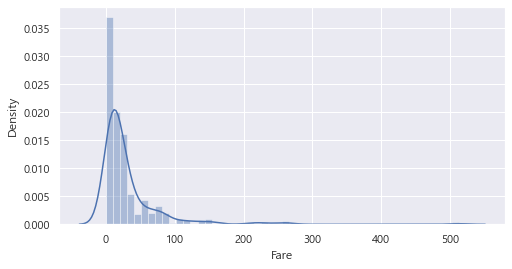

In [41]:
f, ax = plt.subplots(figsize=(8,4))

sns.distplot(data["Fare"])

Skewness: 0.395
Kurtosis: 0.976


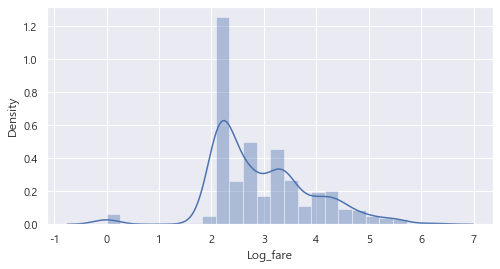

In [42]:
#로그 변환 수행
data['Log_fare'] = np.log1p(data['Fare'])

f, ax = plt.subplots(figsize=(8,4))
sns.distplot(data['Log_fare'])
print('Skewness: {:.3f}'.format(data["Log_fare"].skew()))
print('Kurtosis: {:.3f}'.format(data["Log_fare"].kurt()))

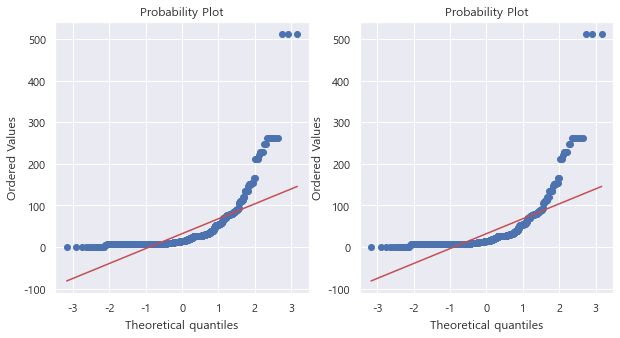

In [43]:
fig = plt.figure(figsize = (10,5))

fig.add_subplot(1,2,1)
res = stats.probplot(data['Fare'], plot= plt)

fig.add_subplot(1,2,2)
res = stats.probplot(data['Fare'], plot=plt)

In [44]:
#train_test_data[0]:train data, train_test_data[1]:Test Data
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
scaler = MinMaxScaler()

for dataset in train_test_data:
    array = dataset['Age'].values.reshape(-1,1)
    scaler.fit(array)
    dataset['AgeScale'] = pd.Series(scaler.transform(array).reshape(-1))
    
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531


In [46]:
print(train['Age'].min())
print(train['Age'].max())
print('            ')
print(train['AgeScale'].min())
print(train['AgeScale'].max())

0.42
80.0
            
0.0
1.0


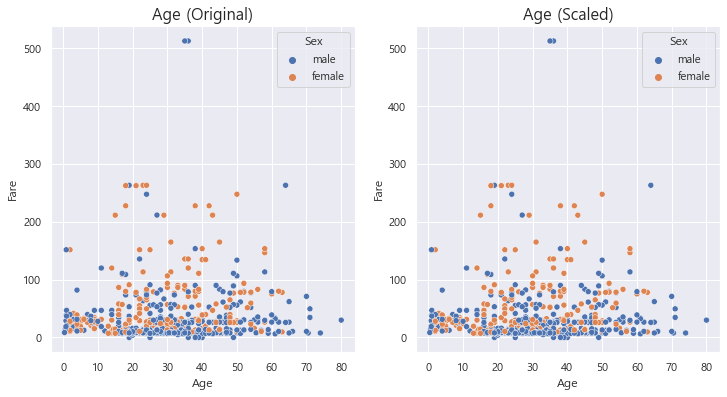

In [47]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
scatter_plot = sns.scatterplot(x='Age',y='Fare',hue='Sex',data=train)
plt.title('Age (Original)', fontsize=16)

plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(x='Age',y='Fare',hue='Sex',data=train)
plt.title('Age (Scaled)', fontsize=16)

plt.show()

In [48]:
#train_test_data[0]:train data, train_test_data[1]:Test Data
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531


In [49]:
for datase in train_test_data:
    dataset['Fare'].fillna(dataset.groupby('Pclass')['Fare'].transform('median'), inplace = True)

for dataset in train_test_data:
    array = dataset['Fare'].values.reshape(-1,1)
    scaler.fit(array)
    dataset['FareScale'] = pd.Series(scaler.transform(array).reshape(-1))
    
train_test_data[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeScale,FareScale
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.271174,0.014151
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.472229,0.139136
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.321438,0.015469
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.434531,0.103644
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.434531,0.015713


In [50]:
print(train['Fare'].mean())
print(train['Fare'].var())
print('            ')
print(train['FareScale'].mean())
print(train['FareScale'].var())

32.2042079685746
2469.436845743117
            
0.06285842768394748
0.009408051926943503


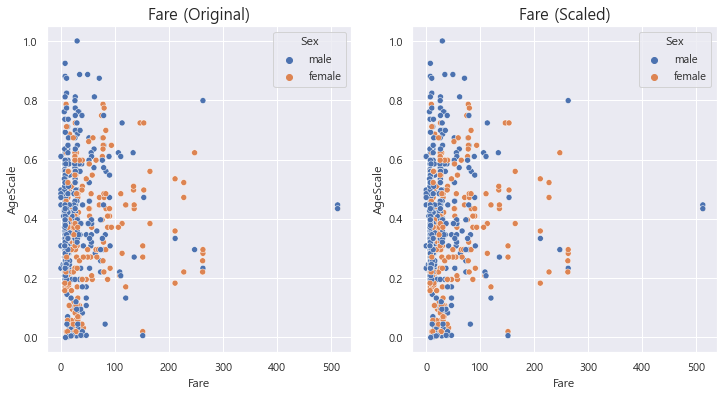

In [51]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
scatter_plot = sns.scatterplot(x='Fare',y='AgeScale',hue='Sex',data=train)
plt.title('Fare (Original)', fontsize=16)

plt.subplot(1,2,2)
scatter_plot = sns.scatterplot(x='Fare',y='AgeScale',hue='Sex',data=train)
plt.title('Fare (Scaled)', fontsize=16)

plt.show()

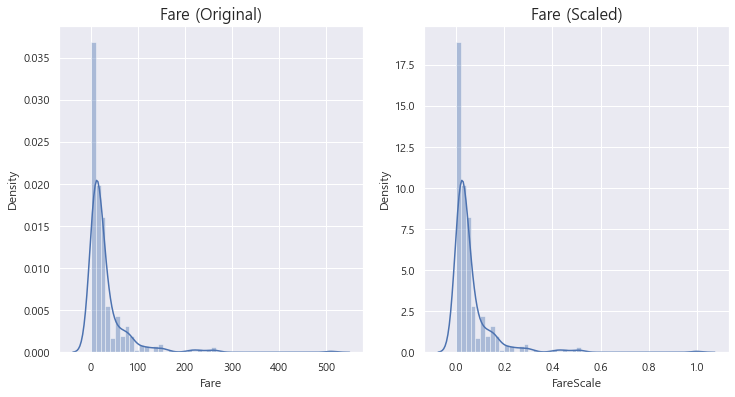

In [52]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
dis_plot = sns.distplot(train['Fare'],label='Fare')
plt.title('Fare (Original)', fontsize=16)

plt.subplot(1,2,2)
dis_plot = sns.distplot(train['FareScale'],label='FareScale')
plt.title('Fare (Scaled)', fontsize=16)

plt.show()

<h1>실습 7</h1>

In [53]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [114]:
from sklearn.datasets import make_classification

from imblearn.under_sampling import *

from imblearn.over_sampling import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import *
from collections import Counter
from matplotlib import pyplot

In [87]:
def Randomforest_Result(x,y,title):
    rf = RandomForestClassifier(criterion='entropy')
    cv_rf = RepeatedStratifiedKFold(n_splits=10, n_repeats=3,random_state=1)
    scores = cross_validate(rf,x,y,scoring='f1',cv=cv_rf,n_jobs=-1)
    print(title,':','3-Fold CV f1 score: %.4f' % np.mean(scores['test_score']))
    return

In [73]:
X_data, y_class = make_classification(n_classes = 2, 
                                      class_sep = 2, 
                                      n_samples=10000,
                                      n_features=20, 
                                      weights=[0.9,0.1],
                                      flip_y=0,
                                      n_clusters_per_class=1,
                                      random_state=10)
print(X_data.shape)
y_class.shape

(10000, 20)


(10000,)

In [111]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    pyplot.show()

Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)


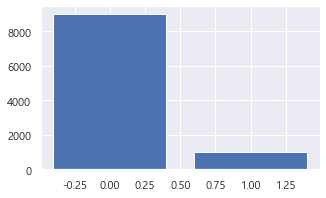

In [115]:
plt.figure(figsize=(5,3))
count_and_plot(y_class)

In [88]:
Randomforest_Result(X_data,y_class,'언더 샘플링_원본 데이터 결과')

언더 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9884


In [118]:
under_random = RandomUnderSampler(sampling_strategy='majority')
X_random, y_random = under_random.fit_resample(X_data,y_class)

Class=0, n=1000 (50.000%)
Class=1, n=1000 (50.000%)


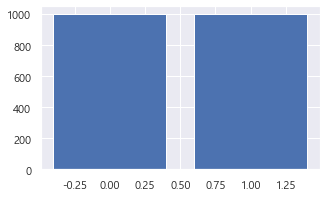

In [120]:
plt.figure(figsize=(5,3))
count_and_plot(y_random)

In [121]:
Randomforest_Result(X_random, y_random,"언더 샘플링 랜덤 언더 샘플링 데이터 결과")

언더 샘플링 랜덤 언더 샘플링 데이터 결과 : 3-Fold CV f1 score: 0.9937


In [122]:
under_random_05=RandomUnderSampler(sampling_strategy=0.5)
X_random_05, y_random_05 = under_random_05.fit_resample(X_data,y_class)

Class=0, n=2000 (66.667%)
Class=1, n=1000 (33.333%)


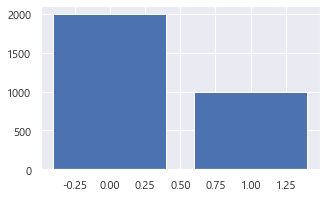

In [124]:
plt.figure(figsize=(5,3))
count_and_plot(y_random_05)

In [126]:
Randomforest_Result(X_random_05, y_random_05,"언더 샘플링 랜덤언더 샘플링 비율:0.5_데이터 결과")

언더 샘플링 랜덤언더 샘플링 비율:0.5_데이터 결과 : 3-Fold CV f1 score: 0.9910


In [127]:
tl= TomekLinks()
X_tl,y_tl = tl.fit_resample(X_data,y_class)

Class=0, n=8993 (89.993%)
Class=1, n=1000 (10.007%)


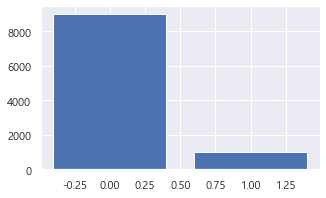

In [129]:
plt.figure(figsize=(5,3))
count_and_plot(y_tl)

In [128]:
Randomforest_Result(X_tl,y_tl,"언더 샘플링_토멕링크_데이터 결과")

언더 샘플링_토멕링크_데이터 결과 : 3-Fold CV f1 score: 0.9889


In [130]:
oss = OneSidedSelection(random_state=42)
X_oss,y_oss=oss.fit_resample(X_data,y_class)

Class=0, n=7666 (88.461%)
Class=1, n=1000 (11.539%)


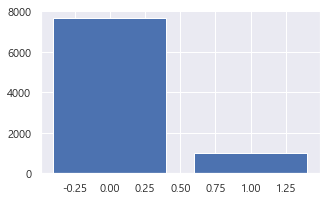

In [131]:
plt.figure(figsize=(5,3))
count_and_plot(y_oss)

In [132]:
Randomforest_Result(X_oss,y_oss,"언더 샘플링_OSS_데이터 결과")

언더 샘플링_OSS_데이터 결과 : 3-Fold CV f1 score: 0.9891


(10000, 20)
Class=0, n=9000 (90.000%)
Class=1, n=1000 (10.000%)


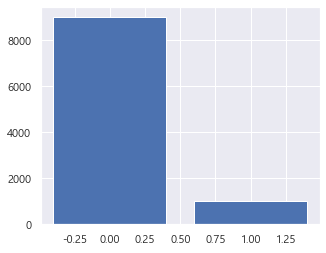

In [134]:
X_data, y_class = make_classification(n_classes= 2, class_sep=2, n_samples=10000,
                                     n_features=20,weights=[0.9,0.1],flip_y=0,
                                     n_clusters_per_class=1,random_state=10)

print(X_data.shape)

y_class.shape

plt.figure(figsize=(5,4))
count_and_plot(y_class)

In [135]:
Randomforest_Result(X_data,y_class,"오버 샘플링_원본 데이터 결과")

오버 샘플링_원본 데이터 결과 : 3-Fold CV f1 score: 0.9886


In [137]:
ros = RandomOverSampler(random_state=42)
X_ros,y_ros=ros.fit_resample(X_data,y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


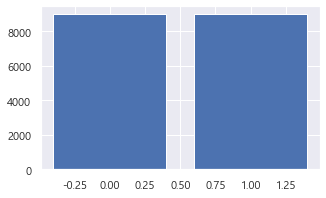

In [138]:
plt.figure(figsize=(5,3))
count_and_plot(y_ros)

In [139]:
smote=SMOTE()
X_sm,y_sm = smote.fit_resample(X_data,y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


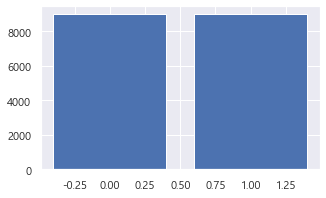

In [140]:
plt.figure(figsize=(5,3))
count_and_plot(y_sm)

In [141]:
ada =ADASYN(random_state=42)
X_ada,y_ada = ada.fit_resample(X_data,y_class)

Class=0, n=9000 (49.972%)
Class=1, n=9010 (50.028%)


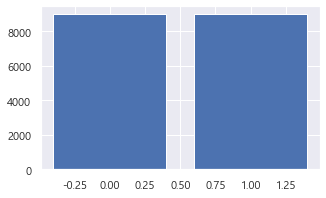

In [142]:
plt.figure(figsize=(5,3))
count_and_plot(y_ada)

In [143]:
bor_sm = BorderlineSMOTE(random_state=42)
X_bor_sm,y_bor_sm = bor_sm.fit_resample(X_data,y_class)

Class=0, n=9000 (50.000%)
Class=1, n=9000 (50.000%)


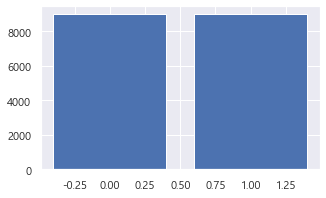

In [145]:
plt.figure(figsize=(5,3))
count_and_plot(y_bor_sm)

In [146]:
Randomforest_Result(X_bor_sm,y_bor_sm,"오버 샘플링_Boderline SMOTE 결과")

오버 샘플링_Boderline SMOTE 결과 : 3-Fold CV f1 score: 0.9987


 <h1>실습 8</h1>

In [147]:
from sklearn.datasets import load_iris

iris = load_iris()

In [148]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [151]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target']=iris.target
    
cols=iris.feature_names
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


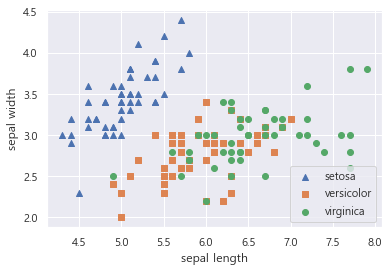

In [155]:
markers=['^','s','o']

#scatter plot

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal length (cm)']
    y_axis_data = df[df['target']==i]['sepal width (cm)']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label = iris.target_names[i])
plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [156]:
iris_scaled=StandardScaler().fit_transform(df.iloc[:,:-1])

In [158]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [160]:
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca= pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(5)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


In [161]:
rcf=RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf,iris.data, iris.target,scoring='accuracy',cv=3)
print("원본 데이터 교차 검증 정확도: ",scores)
print("원본 데이터 교차 검증 평균 정확도: ", np.mean(scores))

원본 데이터 교차 검증 정확도:  [0.98 0.94 0.96]
원본 데이터 교차 검증 평균 정확도:  0.96


In [164]:
pca_X = irisDF_pca[['pca_component_1','pca_component_2']]
scores_pca = cross_val_score(rcf,pca_X,iris.target,scoring='accuracy'
                             ,cv=3)
print("PCA 데이터 교차 검증 정확도: ",scores_pca)
print("PCA 데이터 교차 검증 평균 정확도: ", np.mean(scores_pca))

PCA 데이터 교차 검증 정확도:  [0.88 0.88 0.88]
PCA 데이터 교차 검증 평균 정확도:  0.88


In [165]:
print(df.columns)
df.head()

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [167]:
from sklearn.manifold import TSNE
train_df = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
tsne_np = TSNE(n_components=2).fit_transform(train_df)

tsne_df = pd.DataFrame(tsne_np, columns=['component 0', 'component 1'])

In [168]:
tsne_df.head()

,component 0,component 1
0,-17.926664,-12.379169
1,-15.581841,-13.200589
2,-15.250189,-12.160142
3,-14.987906,-12.406537
4,-17.947941,-11.907646


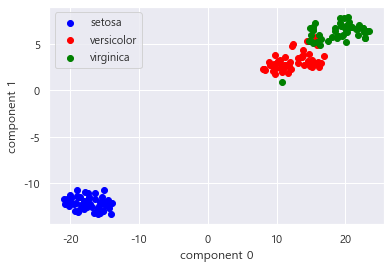

In [169]:
tsne_df['target'] = df['target']

tsne_df_0 = tsne_df[tsne_df['target']==0]
tsne_df_1 = tsne_df[tsne_df['target']==1]
tsne_df_2 = tsne_df[tsne_df['target']==2]

plt.scatter(tsne_df_0['component 0'], tsne_df_0['component 1'], color ='blue', label='setosa')
plt.scatter(tsne_df_1['component 0'], tsne_df_1['component 1'], color ='red', label='versicolor')
plt.scatter(tsne_df_2['component 0'], tsne_df_2['component 1'], color ='green', label='virginica')

plt.xlabel('component 0')
plt.ylabel('component 1')
plt.legend()
plt.show()